# Import Dependencies

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2

In [2]:
import pickle

In [3]:
# with open('Complete_Data.pkl', 'wb') as f:
#     pickle.dump(negative_images,f)

In [4]:
with open('Complete_Data.pkl', 'rb') as f:
    negative_images = pickle.load(f)

In [5]:
# for row_index, row in enumerate(negative_images):
#     num_images = len(row)
#     # Create a figure for the current row with a horizontal layout
#     plt.figure(figsize=(num_images * 2, 2))  # Adjust the width as needed

#     # Iterate through the images in the row
#     for col_index, path in enumerate(row):
#         # Load the image using OpenCV
#         img = cv2.imread(path)
        
#         # Check if the image was loaded successfully
#         if img is not None:
#             # Convert the image from BGR to RGB
#             img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
#             # Add a subplot for the image
#             plt.subplot(1, num_images, col_index + 1)
#             plt.imshow(img_rgb)
#             plt.title(f"Image {col_index + 1}")
#             plt.axis('off')  # Hide the axis
#         else:
#             print(f"Failed to load image: {path}")

#     # Display all images in the current row
#     plt.suptitle(f"Row {row_index + 1}")
#     plt.tight_layout()
#     plt.show()

In [6]:
# import cv2
# import matplotlib.pyplot as plt

# # Example 2D array of image paths


# # Function to display the middle images
# def display_middle_images(images, num_middle=4):
#     num_images = len(images)
#     if num_images <= num_middle:
#         middle_indices = range(num_images)
#     else:
#         start_index = (num_images - num_middle) // 2
#         middle_indices = range(start_index, start_index + num_middle)
    
#     middle_images = [images[i] for i in middle_indices]
#     return middle_images

# # Iterate through each row in the 2D array
# for row_index, row in enumerate(negative_images):
#     middle_images = display_middle_images(row)
#     num_images = len(middle_images)
    
#     # Create a figure for the current row with a horizontal layout
#     plt.figure(figsize=(num_images * 2, 2))  # Adjust the width as needed

#     # Iterate through the middle images in the row
#     for col_index, path in enumerate(middle_images):
#         # Load the image using OpenCV
#         img = cv2.imread(path)
        
#         # Check if the image was loaded successfully
#         if img is not None:
#             # Convert the image from BGR to RGB
#             img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
#             # Add a subplot for the image
#             plt.subplot(1, num_images, col_index + 1)
#             plt.imshow(img_rgb)
#             plt.title(f"Image {col_index + 1}")
#             plt.axis('off')  # Hide the axis
#         else:
#             print(f"Failed to load image: {path}")

#     # Display all images in the current row
#     plt.suptitle(f"Row {row_index + 1}")
#     plt.tight_layout()
#     plt.show()


In [5]:
data = [row for row in negative_images if len(row) >= 4]

In [6]:
def get_middle_four_images(images_list):
    middle_index = len(images_list) // 2
    start_index = middle_index - 2
    return images_list[start_index:start_index + 4]

In [7]:
data = [get_middle_four_images(x) for x in data]

In [8]:
def get_id(lst,csv_file):
    ids = []
    for row in lst:
        if row:  # Check if the row is not empty
            id_ = row[0].split('_')  # Split the first item in the row using '_'
            id_num = id_[-1].strip(".jpg")  # Take the last part and strip ".jpg"
            ids.append(id_num)  # Append the id number to the list
    print(ids)

    df = pd.read_csv(csv_file)
    # Initialize lists for IDs and corresponding categories
    y = []

    # Find categories for each ID in id_list
    for id_num in ids:
        row = df[df['Image Data ID'] == id_num]
        y.append(row['Group'].iloc[0])  # Assuming 'Category' is a single value per ID
        
    return y

In [9]:
csv_file = 'Alzheimer-Research-FinalData/FinalAxialData_7_29_2024.csv'  # Replace with your actual CSV file path

In [10]:
y = get_id(data,csv_file)

['I167921', 'I118481', 'I75181', 'I33926', 'I104450', 'I172498', 'I405663', 'I54956', 'I78212', 'I113280', 'I266981', 'I393310', 'I149717', 'I9117', 'I401843', 'I114208', 'I11647', 'I159931', 'I112896', 'I145413', 'I162249', 'I350773', 'I9118', 'I421548', 'I18209', 'I119097', 'I454834', 'I161152', 'I271853', 'I32936', 'I54636', 'I159929', 'I64467', 'I60123', 'I118486', 'I40081', 'I393313', 'I17305', 'I93250', 'I466054', 'I86852', 'I19157', 'I47330', 'I44484', 'I47325', 'I28109', 'I60875', 'I15322', 'I27054', 'I191669', 'I338539', 'I206940', 'I215915', 'I157177', 'I173730', 'I51108', 'I243360', 'I67797', 'I291189', 'I11644', 'I28562', 'I85021', 'I166616', 'I152600', 'I29707', 'I25794', 'I337721', 'I216135', 'I342895', 'I58189', 'I135397', 'I285277', 'I70098', 'I82863', 'I19154', 'I112893', 'I49179', 'I172499', 'I111592', 'I361396', 'I229062', 'I350775', 'I36416', 'I27055', 'I24237', 'I71753', 'I40504', 'I17302', 'I185091', 'I113293', 'I166287', 'I336754', 'I41120', 'I47613', 'I116762', 

In [11]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example y labels (replace with your actual labels)

# Initialize the LabelEncoder
map = {"CN":0, "MCI":1,"AD":2}

y = [map[label] for label in y]
#y_2 = [map[label] for label in y_2]
# print("Original labels:", y)
# print("Numeric labels:", y_numeric)

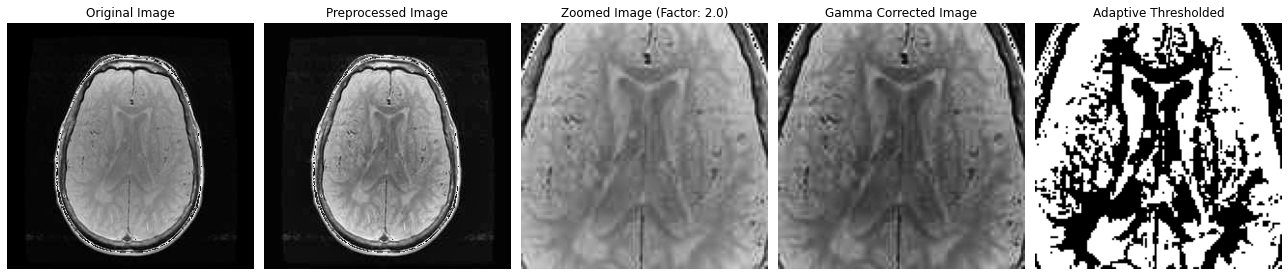

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess, zoom into the central brain region, and highlight the X shape
def preprocess_zoom_and_highlight_better(value, image_path, zoom_factor, block_size=51):
    # Preprocess the image
    def preprocess_image(image):
        # Apply contrast adjustment to each channel
        alpha = 2  # Contrast control (1.0-3.0)
        adjusted_image = np.clip(alpha * image, 0, 255).astype(np.uint8)
        
        # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to each channel
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        clahe_image = np.zeros_like(adjusted_image)
        for i in range(3):  # Assuming image has 3 channels (RGB)
            clahe_image[:, :, i] = clahe.apply(adjusted_image[:, :, i])
        
        return adjusted_image, clahe_image
    
    # Read the image in color
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    
    # Preprocess the image
    original_image, preprocessed_image = preprocess_image(image)
    
    # Get image dimensions
    height, width, _ = preprocessed_image.shape
    
    # Calculate zoomed dimensions
    new_height = int(height / zoom_factor)
    new_width = int(width / zoom_factor)
    
    # Calculate crop boundaries to zoom into the central region
    crop_x = (width - new_width) // 2
    crop_y = (height - new_height) // 2
    
    # Zoom into the central region of the preprocessed image
    zoomed_image = preprocessed_image[crop_y:crop_y + new_height, crop_x:crop_x + new_width]
    
    # Enhance contrast further using gamma correction
    gamma = 1.5
    gamma_corrected = np.clip(np.power(zoomed_image / 255.0, gamma) * 255.0, 0, 255).astype(np.uint8)
    
    # Apply adaptive thresholding to highlight the X shape for each channel separately
    binary_image = np.zeros_like(gamma_corrected)
    for i in range(3):  # Assuming image has 3 channels (RGB)
        gray_channel = cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2GRAY)
        _, binary_channel = cv2.threshold(gray_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        binary_channel = cv2.adaptiveThreshold(gray_channel, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, 5)
        binary_image[:, :, i] = binary_channel
    
    # Display original, preprocessed, zoomed, and highlighted images using Matplotlib
    if value:
        plt.figure(figsize=(18, 6))

        plt.subplot(1, 5, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 5, 2)
        plt.imshow(cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB))
        plt.title('Preprocessed Image')
        plt.axis('off')

        plt.subplot(1, 5, 3)
        plt.imshow(cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Zoomed Image (Factor: {zoom_factor})')
        plt.axis('off')

        plt.subplot(1, 5, 4)
        plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
        plt.title('Gamma Corrected Image')
        plt.axis('off')

        plt.subplot(1, 5, 5)
        plt.imshow(cv2.cvtColor(binary_image, cv2.COLOR_BGR2RGB))
        plt.title('Adaptive Thresholded')
        plt.axis('off')

        plt.tight_layout()
        plt.show()
    
    return original_image, preprocessed_image, zoomed_image, binary_image, gamma_corrected

#Example usage with image_path and zoom_factor
image_path = data[10][2]  # Replace with your image path
zoom_factor = 2.0  # Adjust zoom factor as needed

original_image, preprocessed_image, zoomed_image, Adaptive_Thresholded, gamma_corrected = preprocess_zoom_and_highlight_better(True, image_path, zoom_factor)


In [13]:
# Preprocess Images Using Your Function
def preprocess_images(image_paths, zoom_factor):
    preprocessed_images = []
    for path in image_paths:
        original_image, preprocessed_image, zoomed_image, Adaptive_Thresholded, gamma_corrected = preprocess_zoom_and_highlight_better(False, path, zoom_factor)
        preprocessed_images.append(gamma_corrected)
    return np.array(preprocessed_images)

# Example Data Loading
data_processed = []
labels = []

# Replace `all_sample_paths` and `all_labels` with your actual data loading logic
zoom_factor = 2.0  # Adjust zoom factor as needed
for sample_paths, label in zip(data, y):
    images = preprocess_images(sample_paths, zoom_factor)  # sample_paths is a list of 4 image paths for each sample
    data_processed.append(images)
    labels.append(label)

data_processed = np.array(data_processed)
labels = np.array(labels)
#data, labels = shuffle(data, labels, random_state=42)  # random_state for reproducibility

In [14]:
data_processed.shape

(1529, 4, 128, 128, 3)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_x,test_x,train_y_value,test_y = train_test_split(
    data_processed, labels, test_size=0.1, shuffle=True,random_state = 42)

In [17]:
train_dataset, val_dataset, train_y, val_y = train_test_split(
    train_x, train_y_value, test_size=0.1, shuffle=True,random_state = 42)

In [18]:
train_dataset.shape

(1238, 4, 128, 128, 3)

In [19]:
test_x.shape

(153, 4, 128, 128, 3)

In [20]:
val_dataset.shape

(138, 4, 128, 128, 3)

In [21]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example data setup
# Replace this with your actual data

# Create an ImageDataGenerator instance with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=10,           # Reduced from 20
#     width_shift_range=0.1,       # Reduced from 0.2
#     height_shift_range=0.1,      # Reduced from 0.2
#     shear_range=0.1,             # Reduced from 0.2
#     zoom_range=0.1,              # Reduced from 0.2
#     horizontal_flip=True,
#     fill_mode='nearest'
)


# Function to generate augmented data
def augment_data(X, datagen):
    num_samples = X.shape[0]
    augmented_data = np.empty_like(X)  # Initialize an empty array with the same shape as X
    
    for i in range(num_samples):
        mri_images = X[i]  # Shape (4, 128, 128, 3)
        augmented_mri = []
        for j in range(mri_images.shape[0]):
            image = mri_images[j]
            image = np.expand_dims(image, axis=0)  # Expand dims to (1, 128, 128, 3)
            augmented_image = datagen.flow(image, batch_size=1).next()[0]
            augmented_mri.append(augmented_image)
        augmented_data[i] = np.array(augmented_mri)  # Shape (4, 128, 128, 3)
    
    return augmented_data

# Generate augmented data
X_augmented = augment_data(train_dataset, datagen)

# Now X_augmented contains the augmented data with the same shape as X
print(X_augmented.shape)  # Should be (1313, 4, 128, 128, 3)


(1238, 4, 128, 128, 3)


In [22]:
X_combined = np.concatenate((train_dataset, X_augmented), axis=0)
y_combined = np.concatenate((train_y, train_y), axis=0)  # Duplicate labels accordingly

In [23]:
from sklearn.utils import shuffle

In [24]:
X_combined_final,y_combined_final = shuffle(X_combined,y_combined,random_state = 42)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GRU, LSTM, TimeDistributed, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define the CNN Model for Feature Extraction
def build_cnn_model(input_shape):
    model_input = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(model_input)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)  # Dropout layer
    
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)  # Dropout layer
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)  # Dropout layer
    
    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)  # Dropout layer
    
    x = Flatten()(x)
    model_output = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    
    return Model(model_input, model_output)

input_shape = (128, 128, 3)  # Adjust the shape according to your images

# Define the Combined CNN-GRU Model
def build_cnn_gru_model(input_shape, timesteps):
    cnn_model = build_cnn_model(input_shape)
    cnn_input = Input(shape=(timesteps,) + input_shape)
    
    x = TimeDistributed(cnn_model)(cnn_input)
    x = LSTM(32, return_sequences=True, kernel_regularizer=l2(0.001))(x)  # Increased GRU units
    x = Dropout(0.5)(x)  # Dropout layer
    x = LSTM(16, kernel_regularizer=l2(0.001))(x)  # Increased GRU units
    x = Dropout(0.5)(x)  # Dropout layer
    
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)  # Increased Dense units
    x = Dropout(0.5)(x)  # Dropout layer
    model_output = Dense(3, activation='softmax')(x)
    
    model = Model(cnn_input, model_output)
    
    return model

timesteps = 4  # Number of MRI slices per sample
model_CRNN = build_cnn_gru_model(input_shape, timesteps)

# Compile the Model
model_CRNN.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_CRNN.summary()

# Use early stopping and model checkpoint
callbacks = [
    #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
]



In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint, History, ReduceLROnPlateau


# Define the checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    'complete_cnn.h5',  # File path to save the model
    monitor='accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='min'  # Save the model with the minimum validation loss
)

# History callback is automatically applied, but we can create an instance to access its properties
history_callback = History()
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [27]:
history_CRNN = model_CRNN.fit(X_combined_final,y_combined_final,epochs = 1, batch_size = 128, validation_data = (val_dataset,val_y), callbacks=[checkpoint_callback, history_callback,reduce_lr])

In [28]:
checkpoint_callback_IN = ModelCheckpoint(
    'complete_IN.h5',  # File path to save the model
    monitor='accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='min'  # Save the model with the minimum validation loss
)

In [29]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, TimeDistributed, LSTM

# Define the model
model = Sequential([
    TimeDistributed(InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3)), input_shape=(4, 128, 128, 3)),
    TimeDistributed(GlobalAveragePooling2D()),
    LSTM(32, return_sequences=False),  # Process sequences with LSTM
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Adjust based on the number of classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5)

In [30]:
history = model.fit(X_combined_final,y_combined_final,epochs = 1, batch_size = 64, validation_data = (val_dataset,val_y), callbacks=[checkpoint_callback_IN, history_callback,reduce_lr])

# Load Models

In [32]:
from tensorflow.keras.models import load_model

# Load the model
model_IN = load_model('complete_IN.h5')

# Display the model's architecture
model_IN.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 4, 2, 2, 2048)     21802784  
_________________________________________________________________
time_distributed_2 (TimeDist (None, 4, 2048)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                266368    
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9

In [34]:
from tensorflow.keras.models import load_model

# Load the model
model_cnn = load_model('complete_cnn.h5')

# Display the model's architecture
model_cnn.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4, 128, 128, 3)]  0         
_________________________________________________________________
time_distributed (TimeDistri (None, 4, 128)            2487616   
_________________________________________________________________
lstm (LSTM)                  (None, 4, 32)             20608     
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1088

In [41]:
test_loss, test_accuracy = model.evaluate(test_x, test_y, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

5/5 [==============================] - 2s 192ms/step - loss: 0.7768 - accuracy: 0.8170
Test Loss: 0.7768
Test Accuracy: 0.8170


In [42]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Assume model1 and model2 are your trained models
# test_x is your test data
# test_y is the true labels for the test data

# Step 1: Get predictions from both models
preds1 = model.predict(test_x)
preds2 = model_CRNN.predict(test_x)

# Step 2: Combine the predictions
# Averaging the probabilities
ensemble_preds = (preds1 + preds2) / 2

# Alternatively, you can do a majority vote if your models output class labels directly
# ensemble_preds = np.argmax(preds1, axis=1) + np.argmax(preds2, axis=1)
# ensemble_preds = np.round(ensemble_preds / 2).astype(int)

# Convert probabilities to predicted class labels
ensemble_preds = np.argmax(ensemble_preds, axis=1)

# Step 3: Evaluate the ensemble
accuracy = accuracy_score(test_y, ensemble_preds)
report = classification_report(test_y, ensemble_preds)

print(f"Ensemble Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Ensemble Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88        51
           1       0.69      0.79      0.73        42
           2       0.82      0.83      0.83        60

    accuracy                           0.82       153
   macro avg       0.82      0.81      0.81       153
weighted avg       0.83      0.82      0.82       153



In [ ]:
import numpy as np

# Assuming model is already trained
y_pred = model.predict(val_dataset)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)


In [ ]:
# Find indices where predictions and actual labels don't match
misclassified_indices = np.where(y_pred_labels != val_y)[0]


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

# Assuming model is already trained
y_pred = model.predict(val_dataset)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Find indices where predictions and actual labels don't match
misclassified_indices = np.where(y_pred_labels != val_y)[0]

# Calculate F1 score
f1 = f1_score(val_y, y_pred_labels, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Calculate precision, recall
precision = precision_score(val_y, y_pred_labels, average='weighted')
recall = recall_score(val_y, y_pred_labels, average='weighted')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Calculate confusion matrix
cm = confusion_matrix(val_y, y_pred_labels)

# Calculate TP, FP, FN
TP = np.diag(cm)  # True positives for each class
FP = cm.sum(axis=0) - TP  # False positives for each class
FN = cm.sum(axis=1) - TP  # False negatives for each class

print(f'True Positives (TP): {TP}')
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')


In [ ]:
import matplotlib.pyplot as plt

# Function to visualize all misclassified images with all four images per sample
def visualize_misclassified_images(X, y_true, y_pred, indices):
    num_misclassified = len(indices)
    plt.figure(figsize=(12, 2 * num_misclassified))  # Adjust figure size based on number of misclassified samples
    for i, idx in enumerate(indices):  # Iterate through all misclassified examples
        for j in range(4):
            plt.subplot(num_misclassified, 4, i * 4 + j + 1)
            plt.imshow(X[idx][j])
            if j == 0:
                plt.title(f'True: {y_true[idx]}, Pred: {y_pred[idx]}', fontsize=15)  # Smaller font size
            plt.axis('off')
    
    plt.subplots_adjust(wspace=0.1, hspace=0.2)  # Reduce space between subplots
    plt.tight_layout()
    plt.show()

# Visualize all misclassified images
visualize_misclassified_images(val_dataset, val_y, y_pred_labels, misclassified_indices)
